# Coordinate Reference Systems in R

Coordinate reference systems (CRS) are an essential component of geospatial data. A CRS defines the coordinate system, measurement units, and model of the Earth to which a geospatial data set is referenced. Without a coordinate system of some type, it would be impossible to conduct any type of spatial analysis.
In geospatial analyses, a CRS provides a frame of reference for the datasets involved. When a set of geographic datasets have a common CRS, the features in the different datasets can be geographically 'overlaid' such that the geographical relationships between features in one dataset with those in others can be evaluated. In instances where the geographic datasets are in different CRSs, evaluation of spatial relationships is either not possible or will result in erroneous measurements. Another reason why it is important to know the CRS with which a dataset is associated is different CRSs are premised on different models of the Earth and how distortions to shapes and distances are manifested. For example, the measurement units (i.e. degrees, feet, meters, etc.) used to define a CRS will be utilized in any computations of geographic proximity. Therefore, in order to interpret the measurements and have confidence that they are appropriate for a given task, one first needs to know which measurements are associated with a geographic dataset. A very common problem in this respect is when one populates a function that requires measurement units (i.e. buffer) with values in say miles, but the CRS is actually defined in decimal degrees. Although the function may do something, the output of that function is likely not what was intended by the user.
Thus, when working with geospatial information, one needs to be able to: a) understand the CRS associated with each dataset of interest, b) know which CRS is most appropriate for a study site, and c) know how to transform data in one CRS to another CRS.
A nice overview of CRS options in R can be found here:
-https://www.nceas.ucsb.edu/~frazier/RSpatialGuides/OverviewCoordinateReferenceSystems.pdf

In [30]:
inLibraries = list('repr','rgdal','raster')
for (rpack in inLibraries) {
  if (is.element(rpack,installed.packages()[,1])){           
      #Load the library into R
      suppressMessages(library(rpack,character.only = TRUE))
    }
    else {
        print(paste("Warning:  ",rpack," is not an installed package"))
    }
}
#resize plot area
options(repr.plot.width=6, repr.plot.height=6)

In [31]:
# Read a polygon feature 
inFeature.polys <- readOGR("datasets/us_counties","us_states")

OGR data source with driver: ESRI Shapefile 
Source: "datasets/us_counties", layer: "us_states"
with 49 features
It has 9 fields


In [32]:
# Read a raster data
inFeature.raster <- raster ('datasets/nemo_weather/nemowx3.tif')

## Coordinate Systems and Datum

A common geographic coordinate reference system is the angular system of longitude and latitude. Think of longitude as the 'x' or horizontal coordinate and latitude as the 'y' or vertical coordinate.  In order to measure lat/long coordinates, an estimation on shape of the Earth is needed, something termed a "datum". For example, the shape of the Earth can be approximated as a spheriod or ellipsoid. However, more detailed approximiations can also be considered.  The projInfo () (rgdal library) can be used to access a list of different reference datums that are maintained by the PROJ4 project. See the complete documenation of the CRS elements that are maintained by the PROJ4 project at https://raw.githubusercontent.com/OSGeo/proj.4/gh-pages/proj4.pdf. The WGS84 (World Geodesic System 1984) is one the most commonly used datum and is very similar to the NAD83 (the North American Datum of 1983). To see a list of ellipsoidal approximations that can be called using the rgdal library, run the following code block.

Why are there so many of these? Well, there are lots of areas on the Earth and those areas are each best served by a specific set of reference conditions that minimize error and distortion of geographic measurements.

In [33]:
# List ellipsoid models
projInfo(type="ellps")

name,major,ell,description
MERIT,a=6378137.0,rf=298.257,MERIT 1983
SGS85,a=6378136.0,rf=298.257,Soviet Geodetic System 85
GRS80,a=6378137.0,rf=298.257222101,"GRS 1980(IUGG, 1980)"
IAU76,a=6378140.0,rf=298.257,IAU 1976
airy,a=6377563.396,b=6356256.910,Airy 1830
APL4.9,a=6378137.0.,rf=298.25,Appl. Physics. 1965
NWL9D,a=6378145.0.,rf=298.25,"Naval Weapons Lab., 1965"
mod_airy,a=6377340.189,b=6356034.446,Modified Airy
andrae,a=6377104.43,rf=300.0,"Andrae 1876 (Den., Iclnd.)"
aust_SA,a=6378160.0,rf=298.25,Australian Natl & S. Amer. 1969


In [34]:
# List datums 
projInfo(type="datum")

name,ellipse,definition,description
WGS84,WGS84,"towgs84=0,0,0",
GGRS87,GRS80,"towgs84=-199.87,74.79,246.62",Greek_Geodetic_Reference_System_1987
NAD83,GRS80,"towgs84=0,0,0",North_American_Datum_1983
NAD27,clrk66,"nadgrids=@conus,@alaska,@ntv2_0.gsb,@ntv1_can.dat",North_American_Datum_1927
potsdam,bessel,"towgs84=598.1,73.7,418.2,0.202,0.045,-2.455,6.7",Potsdam Rauenberg 1950 DHDN
carthage,clrk80ign,"towgs84=-263.0,6.0,431.0",Carthage 1934 Tunisia
hermannskogel,bessel,"towgs84=577.326,90.129,463.919,5.137,1.474,5.297,2.4232",Hermannskogel
ire65,mod_airy,"towgs84=482.530,-130.596,564.557,-1.042,-0.214,-0.631,8.15",Ireland 1965
nzgd49,intl,"towgs84=59.47,-5.04,187.44,0.47,-0.1,1.024,-4.5993",New Zealand Geodetic Datum 1949
OSGB36,airy,"towgs84=446.448,-125.157,542.060,0.1502,0.2470,0.8421,-20.4894",Airy 1830


## Projection systems

Once a model of the Earth's shape is selected, this three dimensional system can be transformed to a two dimensional planar system called a projection. Using the projInfo () function (rgdal library) a list of different projection systems can be accessed. Again, why are there so many of these? See the answer to the previous task.

In [35]:
# List projection systems
projInfo(type="proj")

name,description
aea,Albers Equal Area
aeqd,Azimuthal Equidistant
airy,Airy
aitoff,Aitoff
alsk,Mod. Stereographic of Alaska
apian,Apian Globular I
august,August Epicycloidal
bacon,Bacon Globular
bipc,Bipolar conic of western hemisphere
boggs,Boggs Eumorphic


## EPSG code

In order to make it easier to work with different planar coordinate reference systems, the EPSG (European Petroleum Survey Group) code can be called. To access all CRSs maintained by the PROJ4 project (http://proj4.org/), the make_EPSG() function (rgdal library) can be used.  In the EPSG object, the specifics of the coordinate systems are accessible via the prj4 field as a list of parameters, each prefixed with the "+" charater. Parameters include information on projection system, zone, ellipsoid, datum, unit, etc. 

In [36]:
# Create a EPSG object
EPSG <- make_EPSG()
EPSG

code,note,prj4
3819,# HD1909,"+proj=longlat +ellps=bessel +towgs84=595.48,121.69,515.35,4.115,-2.9383,0.853,-3.408 +no_defs"
3821,# TWD67,+proj=longlat +ellps=aust_SA +no_defs
3824,# TWD97,"+proj=longlat +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +no_defs"
3889,# IGRS,"+proj=longlat +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +no_defs"
3906,# MGI 1901,"+proj=longlat +ellps=bessel +towgs84=682,-203,480,0,0,0,0 +no_defs"
4001,# Unknown datum based upon the Airy 1830 ellipsoid,+proj=longlat +ellps=airy +no_defs
4002,# Unknown datum based upon the Airy Modified 1849 ellipsoid,+proj=longlat +ellps=mod_airy +no_defs
4003,# Unknown datum based upon the Australian National Spheroid,+proj=longlat +ellps=aust_SA +no_defs
4004,# Unknown datum based upon the Bessel 1841 ellipsoid,+proj=longlat +ellps=bessel +no_defs
4005,# Unknown datum based upon the Bessel Modified ellipsoid,+proj=longlat +a=6377492.018 +b=6356173.508712696 +no_defs


### Parsing the EPSG Object

As done above, all EPSG codes can be summarized in one table. However, there is a limited ability to narrow an area of interest to pull information specific to one region. This can be done by querying the 'note' field associated with the projection. It's not perfect, but can help one to search for prospects. For example, perhaps you know that your study site is located within zone 15 in a Universal Transverse Mercator (UTM) projection system, but you want to know what type of datum options are available.


In [37]:
# Find projections specific to Missouri
i <- grep("zone 15", EPSG$note, ignore.case=TRUE)

EPSG[i, ]

,code,note,prj4
523,2024,# NAD27(76) / MTM zone 15,+proj=tmerc +lat_0=0 +lon_0=-90 +k=0.9999 +x_0=304800 +y_0=0 +ellps=clrk66 +units=m +no_defs
526,2027,# NAD27(76) / UTM zone 15N,+proj=utm +zone=15 +ellps=clrk66 +units=m +no_defs
704,2212,# ED50 / 3-degree Gauss-Kruger zone 15,"+proj=tmerc +lat_0=0 +lon_0=45 +k=1 +x_0=15500000 +y_0=0 +ellps=intl +towgs84=-87,-98,-121,0,0,0,0 +units=m +no_defs"
820,2329,# Xian 1980 / Gauss-Kruger zone 15,+proj=tmerc +lat_0=0 +lon_0=87 +k=1 +x_0=15500000 +y_0=0 +a=6378140 +b=6356755.288157528 +units=m +no_defs
1022,2531,# Pulkovo 1942 / 3-degree Gauss-Kruger zone 15,"+proj=tmerc +lat_0=0 +lon_0=45 +k=1 +x_0=15500000 +y_0=0 +ellps=krass +towgs84=23.92,-141.27,-80.9,0,0.35,0.82,-0.12 +units=m +no_defs"
1140,2649,# Pulkovo 1995 / 3-degree Gauss-Kruger zone 15,"+proj=tmerc +lat_0=0 +lon_0=45 +k=1 +x_0=15500000 +y_0=0 +ellps=krass +towgs84=24.47,-130.89,-81.56,0,0,0.13,-0.22 +units=m +no_defs"
1649,3159,# NAD83(CSRS) / UTM zone 15N,"+proj=utm +zone=15 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs"
2212,3722,# NAD83(NSRS2007) / UTM zone 15N,"+proj=utm +zone=15 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs"
2235,3745,# NAD83(HARN) / UTM zone 15N,"+proj=utm +zone=15 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs"
2461,4488,# Mexico ITRF92 / UTM zone 15N,"+proj=utm +zone=15 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs"


## CRS for Vector Data

Let's look at some vector features and experiment with accessing, assigning or transforming elements of their CRS in R. The vector features in this example are polygons representing U.S. states.  The summary () function from R standard library when applied to a spatial dataframe will return some information on the CRS associated with a dataset. However, in order to only pull information on coordinate systems, the function proj4string() (rgdal library) can be applied.  First, plot the features and then summarize the CRS.

Note that the projection is UTM zone 15N; the datum is NAD83; the measurement units are in meters; the reference ellipsoid (shape of the Earth) is GRS80.

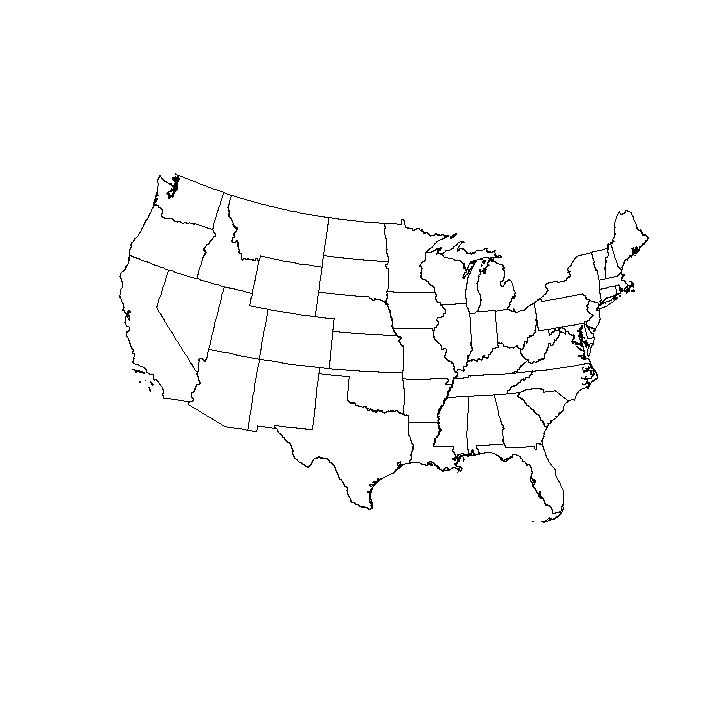

In [38]:
# Plot the feature dataset
plot (inFeature.polys)

In [39]:
# Show projection system information
proj4string (inFeature.polys)

# projection = UTM zone 15N
# datum = NAD83
# measurement units = meters
# reference ellipsoid GRS80

[1] "+proj=utm +zone=15 +datum=NAD83 +units=m +no_defs +ellps=GRS80 +towgs84=0,0,0"

## Transforming CRS

It is often the case that datasets needed for a project will be associated with different CRSs. To work with these datasets in a parsimonious wasy, they should all be transformed into a common CRS. In this lab, the state polygon coordinate system is projected in Universal Transvere Mercator(UTM),NAD83 datum as was determined earlier. If one wished to transform the CRS to latitude/longitude in the same datum NAD83, the EPSG code for long/lat NAD83 can be identified by searching the EPSG object for NAD83. In this case, inspection of the output table reveals that the EPSG code would be 4269.

In [40]:
# Find projections specific to Missouri
i <- grep("NAD83", EPSG$prj4, ignore.case=TRUE)

EPSG[i, ]

,code,note,prj4
198,4269,# NAD83,+proj=longlat +datum=NAD83 +no_defs
697,2205,# NAD83 / Kentucky North,+proj=lcc +lat_1=37.96666666666667 +lat_2=38.96666666666667 +lat_0=37.5 +lon_0=-84.25 +x_0=500000 +y_0=0 +datum=NAD83 +units=m +no_defs
714,2222,# NAD83 / Arizona East (ft),+proj=tmerc +lat_0=31 +lon_0=-110.1666666666667 +k=0.9999 +x_0=213360 +y_0=0 +datum=NAD83 +units=ft +no_defs
715,2223,# NAD83 / Arizona Central (ft),+proj=tmerc +lat_0=31 +lon_0=-111.9166666666667 +k=0.9999 +x_0=213360 +y_0=0 +datum=NAD83 +units=ft +no_defs
716,2224,# NAD83 / Arizona West (ft),+proj=tmerc +lat_0=31 +lon_0=-113.75 +k=0.999933333 +x_0=213360 +y_0=0 +datum=NAD83 +units=ft +no_defs
717,2225,# NAD83 / California zone 1 (ftUS),+proj=lcc +lat_1=41.66666666666666 +lat_2=40 +lat_0=39.33333333333334 +lon_0=-122 +x_0=2000000.0001016 +y_0=500000.0001016001 +datum=NAD83 +units=us-ft +no_defs
718,2226,# NAD83 / California zone 2 (ftUS),+proj=lcc +lat_1=39.83333333333334 +lat_2=38.33333333333334 +lat_0=37.66666666666666 +lon_0=-122 +x_0=2000000.0001016 +y_0=500000.0001016001 +datum=NAD83 +units=us-ft +no_defs
719,2227,# NAD83 / California zone 3 (ftUS),+proj=lcc +lat_1=38.43333333333333 +lat_2=37.06666666666667 +lat_0=36.5 +lon_0=-120.5 +x_0=2000000.0001016 +y_0=500000.0001016001 +datum=NAD83 +units=us-ft +no_defs
720,2228,# NAD83 / California zone 4 (ftUS),+proj=lcc +lat_1=37.25 +lat_2=36 +lat_0=35.33333333333334 +lon_0=-119 +x_0=2000000.0001016 +y_0=500000.0001016001 +datum=NAD83 +units=us-ft +no_defs
721,2229,# NAD83 / California zone 5 (ftUS),+proj=lcc +lat_1=35.46666666666667 +lat_2=34.03333333333333 +lat_0=33.5 +lon_0=-118 +x_0=2000000.0001016 +y_0=500000.0001016001 +datum=NAD83 +units=us-ft +no_defs


### Projecting into the new CRS

Next, the spTransform() function (rgdal library) can be used to transform between CRSs. This function requires a CRS object in the same format as used by the PROJ4 project (see documentation: https://raw.githubusercontent.com/OSGeo/proj.4/gh-pages/proj4.pdf). The output of this function is a new spatial dataframe that is referenced according to the newly specified CRS. First, let's specify the CRS object using the EPSG code. Now, the new featureclass is defined in the long/lat coordinate system under the NAD83 datum. Note that the parameter +towgs84 is defined in the CRS. This means it is a ready form to move to the WGS84 datum if needed. Also note how much different the shape of the country is in this new CRS.

In [41]:
# Transform to angular system (lat/long)
inFeature.polys.GRS <- spTransform(inFeature.polys, CRS("+init=epsg:4269"))

In [42]:
proj4string (inFeature.polys.GRS)

[1] "+init=epsg:4269 +proj=longlat +datum=NAD83 +no_defs +ellps=GRS80 +towgs84=0,0,0"

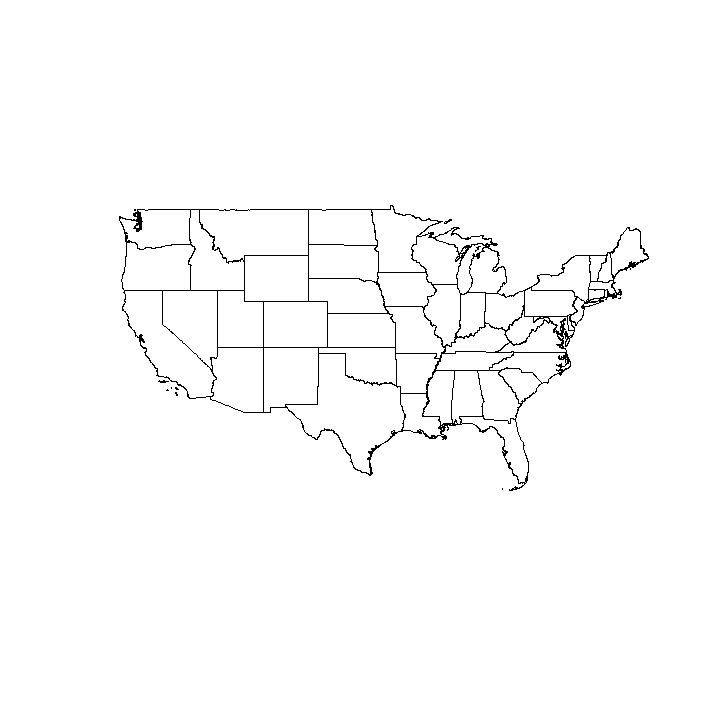

In [43]:
#plot
plot(inFeature.polys.GRS)

### GRS80 vs WGS84 Ellipsoid

Notice that the CRS as reported appear to be slightly different from WGS84. That is, the CRS indicates that it is WGS84, but the ellipsoid is actually GRS80.  If we truely want to have the datum in WGS84, another transformation is needed. However, note that WGS84 and the GRS80 ellipsoids are different, but only in the slightest of ways. In most practical applications, they are considered to be interchangable. In this case, let's move from the lat/long NAD83 datum GRS80 ellipsoid to lat/long WGS84 datum WGS84 ellipsoid.

In [44]:
# Transform to wgs84
inFeature.polys.GCS <- spTransform(inFeature.polys.GRS, CRS("+proj=longlat +datum=WGS84 +no_defs +ellps=WGS84"))

In [45]:
#examine projection
proj4string (inFeature.polys.GCS)

[1] "+proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0"

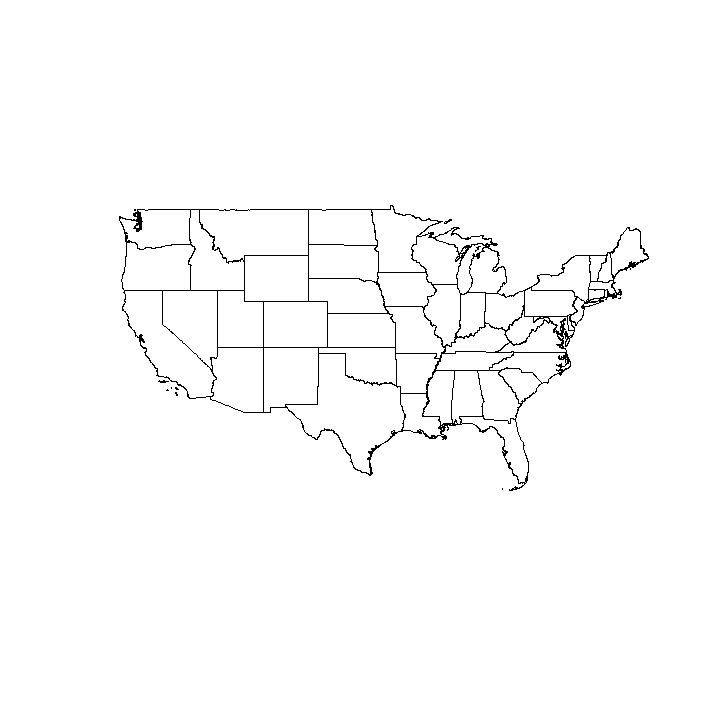

In [46]:
#plot
plot(inFeature.polys.GCS)

## CRS for Raster Data

In order to transform the CRS of raster data, the projectRaster() (raster library) can be used. The raster data used here reflect forecasted temperatures for a portion of Missouri.  There are two approaches to use the projectRaster() function. One approach is to use the CRS argument, typically an easier approach. Another approach is to create a raster object as an template with desirable projection system and same extent and resolution of input raster data. Then, that template object can be used as an argument to projectRaster() function. 

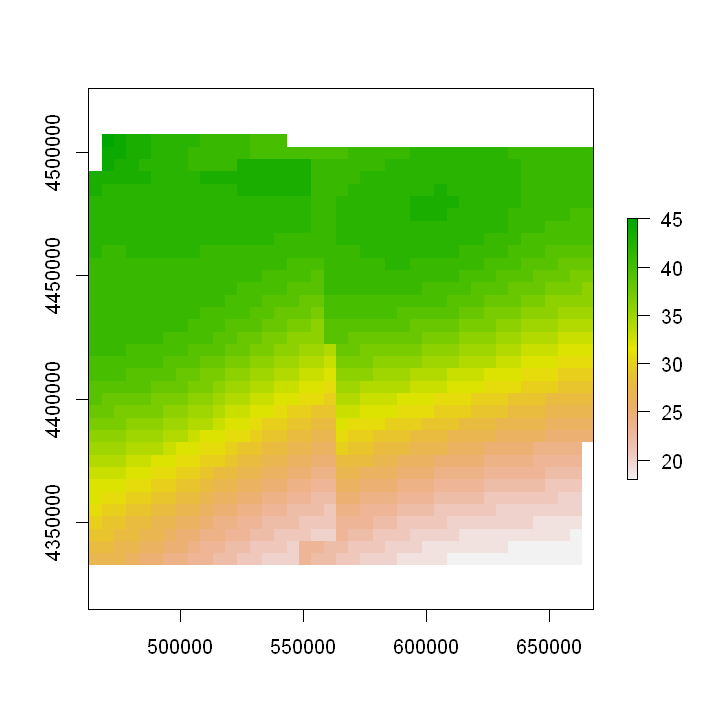

In [47]:
# Plot raster object
plot (inFeature.raster)

In [48]:
# get the crs info for the raster
projection(inFeature.raster)

[1] "+proj=utm +zone=15 +datum=NAD83 +units=m +no_defs +ellps=GRS80 +towgs84=0,0,0"

### Transform to lat/long NAD83 CRS

Now transform the UTM NAD83 CRS to lat/long NAD83 CRS.

In [49]:
# Reproject raster object
RA1 <- projectRaster(inFeature.raster, crs="+init=epsg:4269")

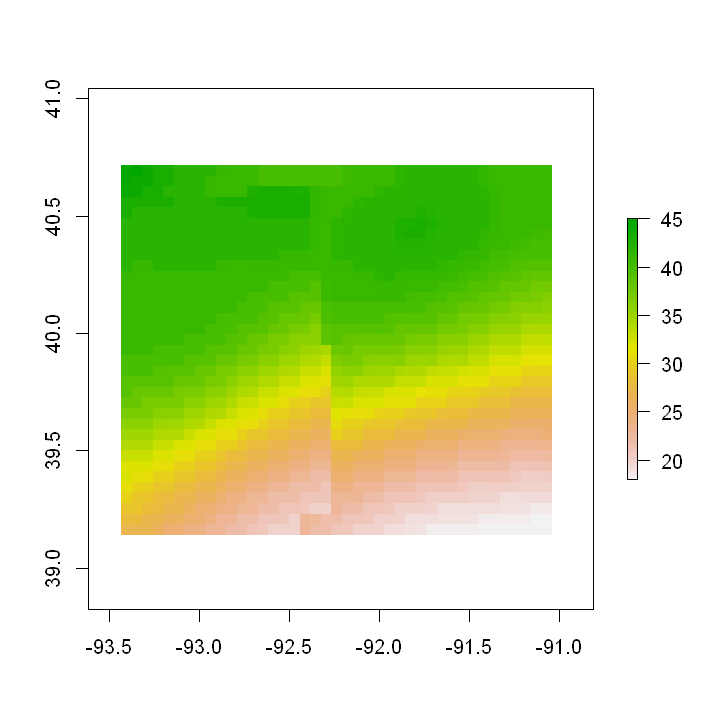

In [50]:
#plot raster
plot(RA1)

### Transform from UTM NAD83 (in meters) CRS to UTM NAD27 Missouri East (in feet) CRS

While the initial CRS of the raster was UTM zone 15N, NAD83 (meters), that particular CRS is good for areas of the state in general. However, the raster used here is actually in the Eastern portion of the state. As such, a CRS refined for that particular area would be more desirable. In order to search for alternatives, query the EPSG object 'note' field for instances of 'missouri'. Let's choose Missouri East (EPSG=3777) which is in feet and also in a different datum NAD27. After it is plotted, compare its rendering with the data as originally projected UTM zone 15N and as projected in lat/long.  

In [51]:
# Find projections specific to Missouri
i <- grep("MISSOURI", EPSG$note, ignore.case=TRUE)

EPSG[i, ]

,code,note,prj4
1306,2815,# NAD83(HARN) / Missouri East,"+proj=tmerc +lat_0=35.83333333333334 +lon_0=-90.5 +k=0.999933333 +x_0=250000 +y_0=0 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs"
1307,2816,# NAD83(HARN) / Missouri Central,"+proj=tmerc +lat_0=35.83333333333334 +lon_0=-92.5 +k=0.999933333 +x_0=500000 +y_0=0 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs"
1308,2817,# NAD83(HARN) / Missouri West,"+proj=tmerc +lat_0=36.16666666666666 +lon_0=-94.5 +k=0.999941177 +x_0=850000 +y_0=0 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs"
2091,3601,# NAD83(NSRS2007) / Missouri Central,"+proj=tmerc +lat_0=35.83333333333334 +lon_0=-92.5 +k=0.999933333 +x_0=500000 +y_0=0 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs"
2092,3602,# NAD83(NSRS2007) / Missouri East,"+proj=tmerc +lat_0=35.83333333333334 +lon_0=-90.5 +k=0.999933333 +x_0=250000 +y_0=0 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs"
2093,3603,# NAD83(NSRS2007) / Missouri West,"+proj=tmerc +lat_0=36.16666666666666 +lon_0=-94.5 +k=0.999941177 +x_0=850000 +y_0=0 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs"
3182,6511,# NAD83(2011) / Missouri Central,+proj=tmerc +lat_0=35.83333333333334 +lon_0=-92.5 +k=0.999933333 +x_0=500000 +y_0=0 +ellps=GRS80 +units=m +no_defs
3183,6512,# NAD83(2011) / Missouri East,+proj=tmerc +lat_0=35.83333333333334 +lon_0=-90.5 +k=0.999933333 +x_0=250000 +y_0=0 +ellps=GRS80 +units=m +no_defs
3184,6513,# NAD83(2011) / Missouri West,+proj=tmerc +lat_0=36.16666666666666 +lon_0=-94.5 +k=0.999941177 +x_0=850000 +y_0=0 +ellps=GRS80 +units=m +no_defs
4198,26796,# NAD27 / Missouri East,+proj=tmerc +lat_0=35.83333333333334 +lon_0=-90.5 +k=0.999933333 +x_0=152400.3048006096 +y_0=0 +datum=NAD27 +units=us-ft +no_defs


In [52]:
# Reproject raster object
RA2 <- projectRaster(inFeature.raster, crs="+init=epsg:26796")

In [53]:
projection(RA2)

[1] "+init=epsg:26796 +proj=tmerc +lat_0=35.83333333333334 +lon_0=-90.5 +k=0.999933333 +x_0=152400.3048006096 +y_0=0 +datum=NAD27 +units=us-ft +no_defs +ellps=clrk66 +nadgrids=@conus,@alaska,@ntv2_0.gsb,@ntv1_can.dat"

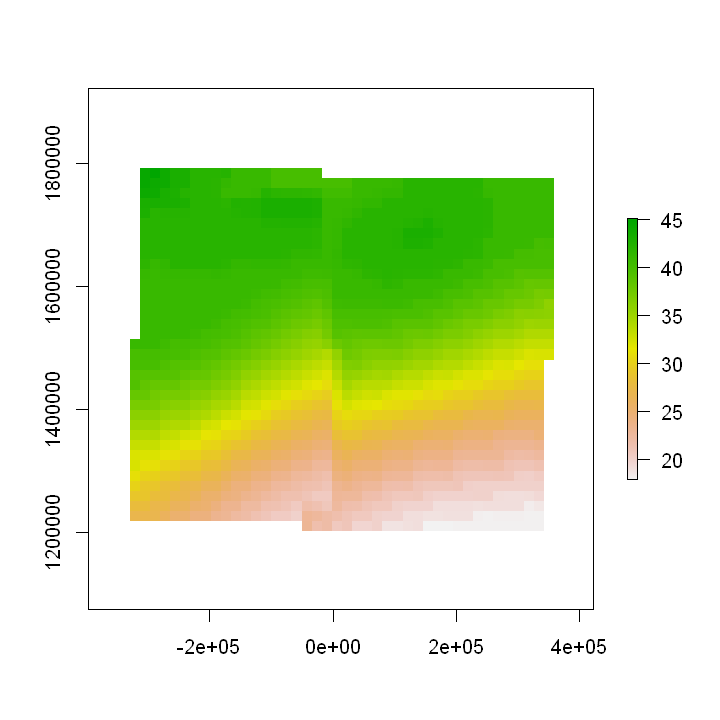

In [54]:
#plot the raster
plot(RA2)